In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(["science", "notebook"])
from helpers import twoside_stretch_grid

In wall turbulence, we must have a stretched grid in the wall-normal direction
to resolve near-wall structures. In this tutorial, we consider a channel flow
with wall-normal direction along the $z$-axis. A double stretched grid can be
obtained on an interval $[0, H]$ by a hyperbolic tangent function
$$
\begin{equation}
    z_k=\frac{H}{2}\left[1 - \frac{\tanh\beta \left(1 - \frac{2k}{N}\right)}{\tanh \beta}\right], \quad k=0,\dots, N,
\end{equation}
$$
with $N$ segments (i.e., $N + 1$ points), and $\beta$ is the stretching parameter.
A function
```python
def twoside_stretch_grid(N, H, beta):
    z = np.zeros(N + 1)
    for k in range(N + 1):
        z[k] = H/2*(1 - np.tanh(beta*(1 - 2*k/N))/np.tanh(beta))

    return z
```
is available to generate this grid. We show an example with
$$
N = 16, \quad H = 2 \text{ and } \beta = 1.2
$$
as shown below.


Text(0, 0.5, '$z$')

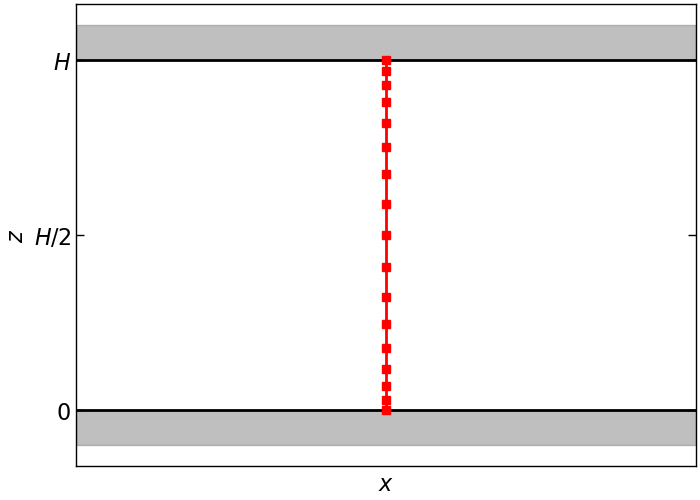

In [33]:
N = 16
H = 2
beta = 1.2
z = twoside_stretch_grid(N, H, beta)

fig, ax = plt.subplots(1, 1)
ax.axhline(0, color='black', linewidth=2)
ax.axhline(2, color='black', linewidth=2)
ax.axhspan(ymin=-0.2, ymax=0, xmin=0, xmax=1, color='gray', alpha=0.5)
ax.axhspan(ymin=2, ymax=2.2, xmin=0, xmax=1, color='gray', alpha=0.5)
x = np.zeros_like(z)
ax.plot(x, z, 'rs-')

ax.set_xticks([])
ax.set_yticks([0, 1, 2])
ax.set_yticklabels([r'$0$', r'$H/2$', r'$H$'])
ax.minorticks_off()
ax.set_xlabel(r"$x$")
ax.set_ylabel(r'$z$')

We can have a more stretched grid with larger $\beta$.

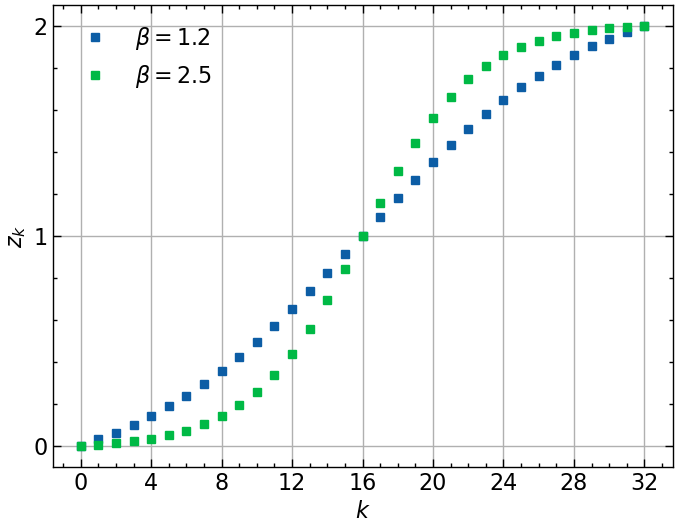

In [42]:
N = 32
H = 2

fig, ax = plt.subplots(1, 1)
for beta in [1.2, 2.5]:
    z = twoside_stretch_grid(N, H, beta)
    ax.plot(np.arange(N + 1), z, 's', label=rf'$\beta={beta:.1f}$')

ax.set_xlabel(r"$k$")
ax.set_ylabel(r"$z_k$")
ax.set_xticks(np.arange(9)*4)
ax.set_yticks([0, 1, 2])
ax.legend()
ax.grid()